<a href="https://colab.research.google.com/github/RenanMB0/evolucao-renan/blob/main/projeto_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dados = pd.read_csv("/content/drive/MyDrive/projetos renan/Depression Student Dataset.csv")

In [ ]:
dados.head()

,Gender,Age,Academic Pressure,Study Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,28,2.0,4.0,7-8 hours,Moderate,Yes,9,2,Yes,No
1,Male,28,4.0,5.0,5-6 hours,Healthy,Yes,7,1,Yes,No
2,Male,25,1.0,3.0,5-6 hours,Unhealthy,Yes,10,4,No,Yes
3,Male,23,1.0,4.0,More than 8 hours,Unhealthy,Yes,7,2,Yes,No
4,Female,31,1.0,5.0,More than 8 hours,Healthy,Yes,4,2,Yes,No


In [ ]:
dados_depressao = dados.query("Depression == 'Yes'")

In [ ]:
# Filtrar e contar os casos de pensamentos suicidas por gênero
homens_mulheres = (
    dados_depressao.query("`Have you ever had suicidal thoughts ?` == 'Yes'")
    .groupby("Gender")["Have you ever had suicidal thoughts ?"]
    .count()
    .sort_values(ascending=False)  # Ordenar do maior para o menor
)

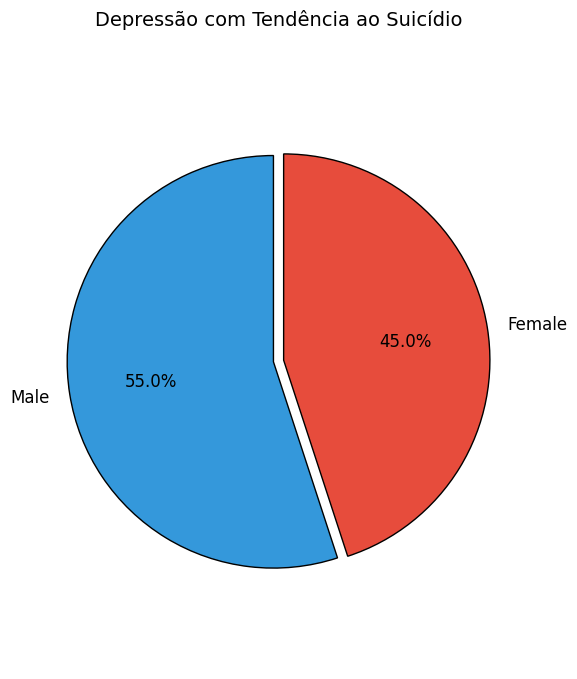

In [ ]:
plt.figure(figsize=(6, 8))
colors = ['#3498db', '#e74c3c']
explode = [0.05, 0]
plt.pie(
    homens_mulheres,
    labels=homens_mulheres.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    explode=explode,
    wedgeprops={'edgecolor': 'black'})
plt.title('Depressão com Tendência ao Suicídio', fontsize=14, pad=20)
plt.axis('equal')
plt.show()


In [ ]:
df1 = dados_depressao[["Age", "Depression"]]
idade_depressao_pensamentos = dados_depressao[dados_depressao["Have you ever had suicidal thoughts ?"] == "Yes"].groupby("Age")["Depression"].count()

<ipython-input-36-f6f4aa3e3e45>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=idade_depressao_pensamentos.index,y=idade_depressao_pensamentos.values,palette=palette)


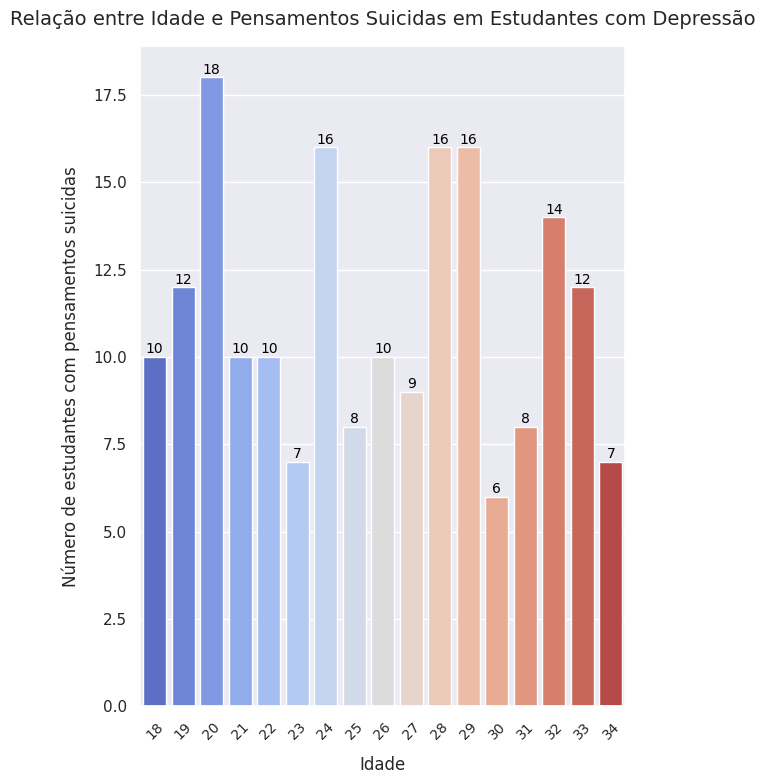

In [ ]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(6, 8))
palette = sns.color_palette("coolwarm", len(idade_depressao_pensamentos))
sns.barplot(x=idade_depressao_pensamentos.index,y=idade_depressao_pensamentos.values,palette=palette)
plt.xlabel("Idade", fontsize=12, labelpad=10)
plt.ylabel("Número de estudantes com pensamentos suicidas", fontsize=12, labelpad=10)
plt.title("Relação entre Idade e Pensamentos Suicidas em Estudantes com Depressão", fontsize=14, pad=15)
plt.xticks(rotation=45, fontsize=10)
for i, value in enumerate(idade_depressao_pensamentos.values):
    plt.text(i, value + 0.1, str(value), ha='center', fontsize=10, color="black")
plt.tight_layout()
plt.show()


In [ ]:
df3 = dados_depressao[["Financial Stress", "Have you ever had suicidal thoughts ?"]]
df3["Financial Stress"] = df3["Financial Stress"].replace({
    1: "Muito baixo",
    2: "Baixo",
    3: "Médio",
    4: "Alto",
    5: "Muito alto"
})

<ipython-input-37-e1b5923ebe0c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["Financial Stress"] = df3["Financial Stress"].replace({


In [ ]:
stress = df3.query("`Have you ever had suicidal thoughts ?` == 'Yes'").groupby("Financial Stress").size()

<ipython-input-39-7d55c08e973e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=stress.index, y=stress.values, palette="viridis")


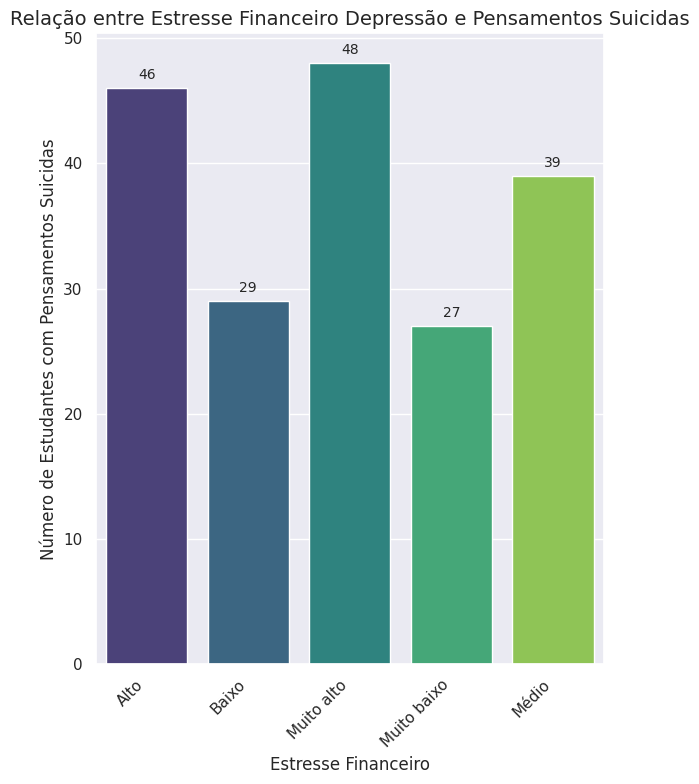

In [ ]:
plt.figure(figsize=(6, 8))
# The 'y' value should be the count, which is the value of the 'stress' Series itself
sns.barplot(x=stress.index, y=stress.values, palette="viridis")
plt.xlabel("Estresse Financeiro", fontsize=12)
plt.ylabel("Número de Estudantes com Pensamentos Suicidas", fontsize=12)
plt.title("Relação entre Estresse Financeiro Depressão e Pensamentos Suicidas", fontsize=14)
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability

# Add value labels on top of each bar
for i, v in enumerate(stress.values): # Iterate over stress.values for counts
    plt.text(i, v + 0.5, str(v), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

In [ ]:
 df4 = dados_depressao[["Dietary Habits", "Have you ever had suicidal thoughts ?"]]

 alimentacao = df4["Dietary Habits"] = df4["Dietary Habits"].replace({
    "Unhealthy": "Não Saudável",
    "Moderate": "Moderado",
    "Healthy": "Saudável"
})

alimentacao

<ipython-input-40-01a589f843c4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alimentacao = df4["Dietary Habits"] = df4["Dietary Habits"].replace({


,Dietary Habits
2,Não Saudável
5,Não Saudável
6,Moderado
7,Saudável
9,Não Saudável
...,...
494,Não Saudável
496,Não Saudável
497,Não Saudável
498,Não Saudável


<ipython-input-41-3d162b808641>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4["Dietary Habits"] = df4["Dietary Habits"].replace({
<ipython-input-41-3d162b808641>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=alimentacao.index, y=alimentacao.values, palette="magma")


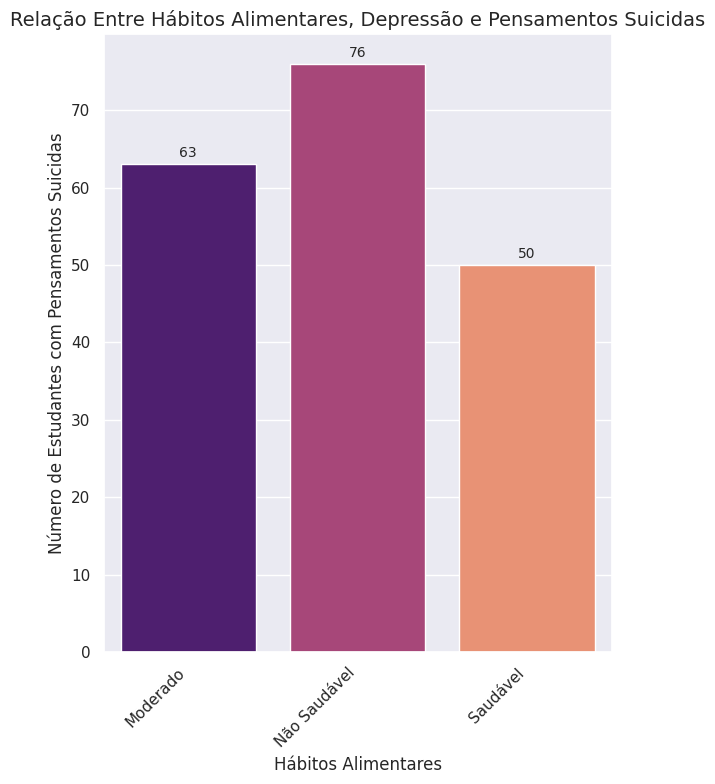

In [ ]:
df4 = dados_depressao[["Dietary Habits", "Have you ever had suicidal thoughts ?"]]

df4["Dietary Habits"] = df4["Dietary Habits"].replace({
    "Unhealthy": "Não Saudável",
    "Moderate": "Moderado",
    "Healthy": "Saudável"
})

alimentacao = df4.query("`Have you ever had suicidal thoughts ?` == 'Yes'").groupby("Dietary Habits").size()

plt.figure(figsize=(6, 8))
sns.barplot(x=alimentacao.index, y=alimentacao.values, palette="magma")
plt.xlabel("Hábitos Alimentares", fontsize=12)
plt.ylabel("Número de Estudantes com Pensamentos Suicidas", fontsize=12)
plt.title("Relação Entre Hábitos Alimentares, Depressão e Pensamentos Suicidas", fontsize=14)
plt.xticks(rotation=45, ha="right")

for i, v in enumerate(alimentacao.values):
    plt.text(i, v + 0.5, str(v), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

In [ ]:
df5 = dados[["Family History of Mental Illness", "Depression"]]

# Perform the replacement on the 'Family History of Mental Illness' column within df5
df5["Family History of Mental Illness"] = df5["Family History of Mental Illness"].replace({
    "Yes": "Doença Mental na Familia",
    "No": "Sem Doença Mental na Familia"
})

<ipython-input-42-e82b5138f892>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5["Family History of Mental Illness"] = df5["Family History of Mental Illness"].replace({


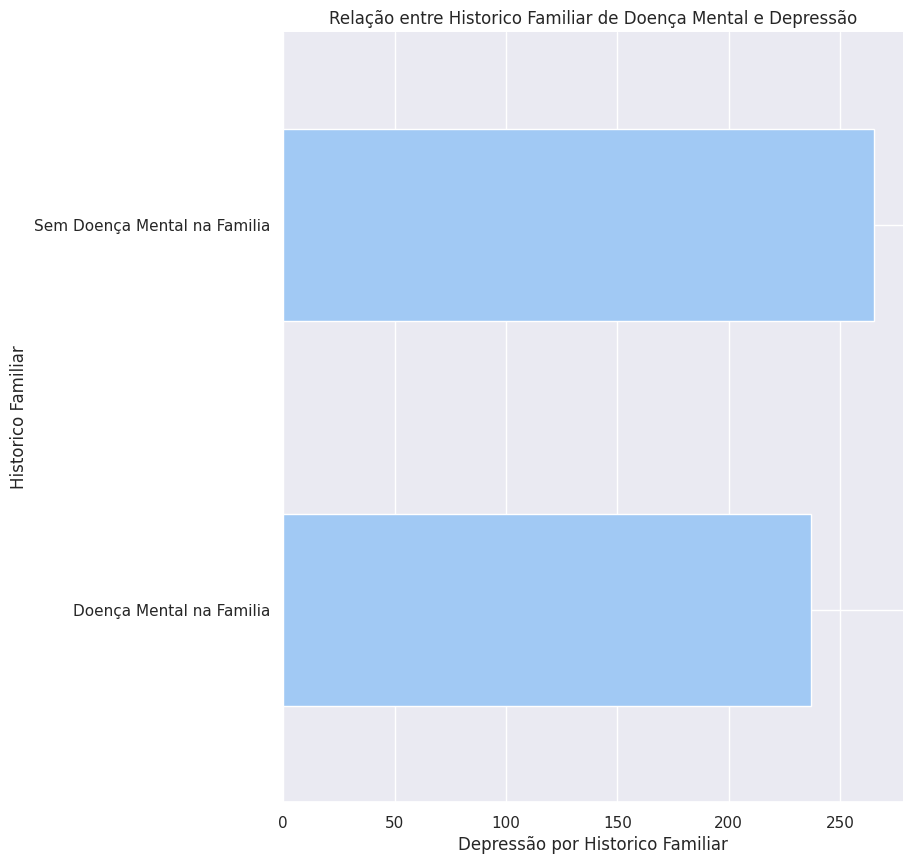

In [ ]:
sns.set_palette("pastel")

# Create the bar chart
plt.figure(figsize=(8, 10))
ax = df5.groupby('Family History of Mental Illness').size().plot(kind='barh')

# Customize the plot
plt.title("Relação entre Historico Familiar de Doença Mental e Depressão")
plt.xlabel("Depressão por Historico Familiar")
plt.ylabel("Historico Familiar")
plt.gca().spines[['top', 'right']].set_visible(False)

# Adjust font size and style
plt.rcParams.update({'font.size': 12, 'font.family': 'sans-serif'})

plt.show()